In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor, TensorTKD, residual_tensor
from hottbox.algorithms.decomposition import HOSVD, HOOI
from coursework.data import get_image, plot_tensors

In [7]:
np.random.seed(0)

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tucker Decomposition

<img src="./imgs/TensorTKD.png" alt="Drawing" style="width: 500px;"/>

In previous [assignment](./2_Efficient_representation_of_multidimensional_arrays.ipynb), you have been provided materials which cover efficient representations of mutlidimensional arrays of data, such as the Tucker form. In this module, you will take a closer look at it and the assiciated computational methods.


Any tensor of arbitrarily large order can be decomposed in the Tucker form. As illustrated above, a tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$ can be represented as a dense core tensor $\mathbf{\underline{G}}$ and a set of factor matrices $\mathbf{A} \in \mathbb{R}^{I \times Q}, \mathbf{B} \in \mathbb{R}^{J \times R}$ and $\mathbf{C} \in
\mathbb{R}^{K \times P}$

$$
\mathbf{\underline{X}} = \mathbf{\underline{G}} \times_1 \mathbf{A} \times_2 \mathbf{B} \times_3 \mathbf{C} = \Big[    \mathbf{\underline{G}} ;  \mathbf{A},  \mathbf{B}, \mathbf{C}      \Big]
$$


On practice, there exist several computational methods to accomplish this all of which are combined into a Tucker Decomposition framework. The two most commonly used algorithms are:
1. Higher Order Singular Value Decomposition ([HOSVD](#Higher-Order-Singular-Value-Decomposition-(HOSVD)))
1. Higher Order Orthogonal Iteration ([HOOI](#Higher-Order-Orthogonal-Iteration-(HOOI)))


# Higher Order Singular Value Decomposition (HOSVD)

The HOSVD is a special case of the Tucker decomposition, in which all the factor matrices are constrained to be orthogonal. They are computed as truncated version of the left singular matrices of all possible mode-$n$ unfoldings of tensor $\mathbf{\underline{X}}$:

$$
\begin{aligned}
\mathbf{X}_{(1)} &= \mathbf{U}_1  \mathbf{\Sigma}_1 \mathbf{V}_1^T \quad \rightarrow \quad \mathbf{A} = \mathbf{U}_1[1:R_1]\\
\mathbf{X}_{(2)} &= \mathbf{U}_2  \mathbf{\Sigma}_2 \mathbf{V}_2^T \quad \rightarrow \quad \mathbf{B} = \mathbf{U}_2[1:R_2] \\
\mathbf{X}_{(3)} &= \mathbf{U}_3  \mathbf{\Sigma}_3 \mathbf{V}_3^T \quad \rightarrow \quad \mathbf{C} = \mathbf{U}_3[1:R_3] \\
\end{aligned}
$$

After factor matrices are obtained, the core tensor $\mathbf{\underline{G}}$ is computed as

$$
\mathbf{\underline{G}} = \mathbf{\underline{X}} \times_1 \mathbf{A}^T \times_2 \mathbf{B}^T \times_3 \mathbf{C}^T        
$$


# Higher Order Orthogonal Iteration (HOOI)

HOOI algorithm is another special case of the Tuker decomposition. Like HOSVD, it decomposes a tensor into a dense core tensor and orthogonal factor matrices. The difference between the two lies in the fact that in HOOI the factor matrices are optimized iteratively using an Alternating Least Squares (ALS) approach. In other words, the tucker representation $[ \mathbf{\underline{G}};\mathbf{A}^{(1)}, \mathbf{A}^{(2)}, \cdots,\mathbf{A}^{(N)} ]$ of the given tensor $\mathbf{\underline{X}}$ is obtained through the HOOI as follows

$$
\begin{aligned}
&\mathbf{\underline{Y}} = \mathbf{\underline{X}} \times_1 \mathbf{A}^{(1)T} \times_2 \cdots \times_{n-1} \mathbf{A}^{(n-1)T} \times_{n+1} \mathbf{A}^{(n+1)} \times \cdots \times_N \mathbf{A}^{(N)} \\
&\mathbf{A}^{(n)} \leftarrow R_n \text{ leftmost singular vectors of } \mathbf{Y}_{(n)}
\end{aligned}
$$

The above is repeated until convergence, then the core tensor $\mathbf{\underline{G}} \in \mathbb{R}^{R_1 \times R_2 \times \cdots \times R_N}$ is computed as

$$
\mathbf{\underline{G}} = \mathbf{\underline{X}} \times_1 \mathbf{A}^{(1)T}  \times_2 \mathbf{A}^{(2)T} \times_3 \cdots  \times_N \mathbf{A}^{(N)T}
$$

# Multi-linear rank

The **multi-linear rank** of a tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I_1 \times \cdots \times I_N}$ is the $N$-tuple $(R_1, \dots, R_N)$ where each $R_n$ is the rank of the subspace spanned by mode-$n$ fibers, i.e. $R_n = \text{rank} \big( \mathbf{X}_{(n)} \big)$. Thus, for our order-$3$ tensor the multi-linear rank is $(R_1, R_2, R_3)$. Multi-linear rank provides flexibility in compression and approximation of the original tensor.

> **NOTE:** For a tensor of order $N$ the values $R_1, R_2, \dots , R_N$ are not necessarily the same, whereas, for matrices (tensors of order 2) the equality $R_1 = R_2$ always holds, where $R_1$ and $R_2$ are the matrix column rank and row rank respectively.



# Performing tensor decomposition

In [8]:
# Create tensor
I, J, K = 5, 6, 7
array_3d = np.random.rand(I * J * K).reshape((I, J, K)).astype(np.float)
tensor = Tensor(array_3d)

# Initialise algorithm
algorithm = HOSVD()

# Perform decomposing for selected multi-linear rank
ml_rank = (4, 5, 6)
tensor_tkd = algorithm.decompose(tensor, ml_rank)

# Result preview
print(tensor_tkd)

print('\n\tFactor matrices')
for mode, fmat in enumerate(tensor_tkd.fmat):
    print('Mode-{} factor matrix is of shape {}'.format(mode, fmat.shape))
    
print('\n\tCore tensor')
print(tensor_tkd.core)

Tucker representation of a tensor with multi-linear rank=(4, 5, 6).
Factor matrices represent properties: ['mode-0', 'mode-1', 'mode-2']
With corresponding latent components described by (5, 6, 7) features respectively.

	Factor matrices
Mode-0 factor matrix is of shape (5, 4)
Mode-1 factor matrix is of shape (6, 5)
Mode-2 factor matrix is of shape (7, 6)

	Core tensor
This tensor is of order 3 and consists of 120 elements.
Sizes and names of its modes are (4, 5, 6) and ['mode-0', 'mode-1', 'mode-2'] respectively.


# Evaluation and reconstruction

Tucker representation of an original tensor is almost always an approximation, regardless of which algorithm has been employed for performing decomposition. Thus, relative error of approximation is commonly used in order to evaluate performance of computational methods, i.e. the ratio between a Frobenious norms of residual and original tensors.

In [9]:
# Compute residual tensor
tensor_res = residual_tensor(tensor, tensor_tkd)

# Compute error of approximation
rel_error = tensor_res.frob_norm / tensor.frob_norm

print("Relative error of approximation = {}".format(rel_error))

Relative error of approximation = 0.21320264561618074


## **Assigment 1**

1. Create a tensor of order 4 with sizes of each mode being defined by prime numbers and  obtain a Tucker representation using HOOI algorithm with multi-linear (4, 10, 6, 2). Then calculation ratio between the number of elements in the original tensor and its Tucker form.

1. For a tensor that consists of 1331 elements, which multi-linear rank guarantees a perfect reconstruction from its Tucker form and why. Is such choice reasonable for practical applications?


### Solution: Part 1

In [11]:
# Create a tensor
I, J, K, L = 7, 11, 13, 17
array_1_1 = np.random.rand(I * J * K * L).reshape((I, J, K, L)).astype(np.float)
tensor_1_1 = Tensor(array_1_1)

In [14]:
# Perform decomposition
alg = HOOI()
ml_rank = (4, 10, 6, 2)
tensor_tkd_hooi = alg.decompose(tensor_1_1, ml_rank)
print("\tOutput of the {} algorithm:".format(alg.name))
print(tensor_tkd_hooi)

print('\n\tFactor matrices')
for mode, fmat in enumerate(tensor_tkd_hooi.fmat):
    print('Mode-{} factor matrix is of shape {}'.format(mode, fmat.shape))
    
print('\n\tCore tensor')
print(tensor_tkd_hooi.core)

	Output of the HOOI algorithm:
Tucker representation of a tensor with multi-linear rank=(4, 10, 6, 2).
Factor matrices represent properties: ['mode-0', 'mode-1', 'mode-2', 'mode-3']
With corresponding latent components described by (7, 11, 13, 17) features respectively.

	Factor matrices
Mode-0 factor matrix is of shape (7, 4)
Mode-1 factor matrix is of shape (11, 10)
Mode-2 factor matrix is of shape (13, 6)
Mode-3 factor matrix is of shape (17, 2)

	Core tensor
This tensor is of order 4 and consists of 480 elements.
Sizes and names of its modes are (4, 10, 6, 2) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [16]:
# Print ratio
ele_org = tensor_1_1.size
ele_hooi = tensor_tkd_hooi.core.size
print('The number of elements of original tensor {}'.format(ele_org))
print('The number of elements of HOOI tensor {}'.format(ele_hooi))
ratio = ele_org/ele_hooi
print('The ratio between the number of elements in the original tensor with its decomposion form based on HOOI is {}.'.format(ratio))

The number of elements of original tensor 17017
The number of elements of HOOI tensor 480
The ratio between the number of elements in the original tensor with its decomposion form based on HOOI is 35.452083333333334.


### Solution: Part 2

Because the original tensor contains 1331 elements. According to prime decomposition, $1331=11\times 11\times 11$. In addition, if the order of tensor is equal to 2, which is called matrice, the rank $R_1$ and $R_2$ should be equal with each other. However, 1331 elements is unable to make $R_1$ equal to $R_2$. Therefore, the best multi-linear rank should be $\mathbf{\underline{X}} \in \mathbb{R}^{11\times 11\times \times 11}$. In the practical applications, this multi-linear rank is not suitable. Because it contains all the data and will not result in any compression effect.


# Application: Image compression 

Color images can be naturally represented as a tensor of order three with the shape `(height x width x channels)` where channels are, for example, Red, Blue and Green (RGB)

<img src="./imgs/image_to_base_colors.png" alt="Drawing" style="width: 500px;"/>

By keeping its original structure, allows to apply methods from multi-linear analysis. For instance, we can employ algorithms for Tucker decompositions in order to commress oringinal informaiton by varying values of desired multi-linear rank.

```python
# Get data in form of a Tensor
car = get_image(item="car", view="top")
tensor = Tensor(car)

# Initialise algorithm and preform decomposition
algorithm = HOSVD()
tensor_tkd = algorithm.decompose(tensor, rank=(25, 25, 3))

# Evaluate result
tensor_res = residual_tensor(tensor, tensor_tkd)
rel_error = tensor_res.frob_norm / tensor.frob_norm

print("Relative error of approximation = {}".format(rel_error))
```

When can also visually inspect image obtained by reconstructing the Tucker representation
```python
# Reconstruction
tensor_rec = tensor_tkd.reconstruct()

# Plot original and reconstructed images side by side
plot_tensors(tensor, tensor_rec)
```

<img src="./imgs/car_orig_vs_reconstructed_25_25_3.png" alt="Drawing" style="width: 500px;"/>

## **Assigment 2**
For this assignment you are provided with function `get_image()` which requires two parameters: `item` and `view`. The valid values for former are **car** and **apple**, while the latter takes only **side** and **top**. 

1. Use multi-linear rank equal to `(50, 50, 2)` in order to obtain Tucker representations of images of the car and apple. Analyse results by visually inspecting their reconstructions.

1. Use multi-linear rank equal to `(50, 50, 2)` in order to obtain Tucker representations of images of the apple taken from the top and from the side. Analyse results by visually inspecting their reconstructions.

1. What would happen to the reconstruction if the value of multi-linear rank corresponding to the channel mode is decreased to 1.


### Solution: Part 1

In [17]:
# Create tensors from images
car = get_image(item="car", view="top")
tensor_car = Tensor(car)
apple = get_image(item="apple", view="top")
tensor_apple = Tensor(apple)

In [18]:
# Perform decomposition
# Initialise algorithm and preform decomposition
algorithm = HOSVD()
tensor_tkd_car = algorithm.decompose(tensor_car, rank=(50, 50, 2))
tensor_tkd_apple = algorithm.decompose(tensor_apple, rank=(50, 50, 2))


Relative error of car image = 0.04991577804571514
Relative error of apple image = 0.03706225838740839



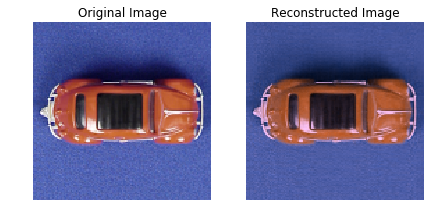

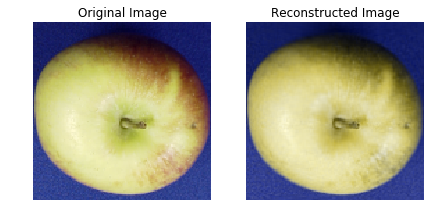

In [20]:
# Evaluate results
tensor_res_car = residual_tensor(tensor_car, tensor_tkd_car)
tensor_res_apple = residual_tensor(tensor_apple, tensor_tkd_apple)
rel_error_car = tensor_res_car.frob_norm / tensor_car.frob_norm
rel_error_apple = tensor_res_apple.frob_norm / tensor_apple.frob_norm
print("Relative error of car image = {}".format(rel_error_car))
print("Relative error of apple image = {}\n".format(rel_error_apple))
# Reconstruction
tensor_rec_car = tensor_tkd_car.reconstruct()
tensor_rec_apple = tensor_tkd_apple.reconstruct()

# Plot original and reconstructed images side by side
plot_tensors(tensor_car, tensor_rec_car)
plot_tensors(tensor_apple, tensor_rec_apple)

The reconstruction of car image is much better than apple image's reconstruction. In the car image, the main colour are red and blue, while black is generated if the values of R, G and B are set as 0 and white is generated if the values of R, G and B are set as 1. Thus, when the tensor is decomposed to $\mathbb{R}^{50\times 50\times \times 2}$, it will loss little information. As for apple image, it contains both red, green and blue. In the reconstruction, the colour red disappered. The reason is that the colour red contains the least information comparing with other two colours. Thus, in the decomposions, the information of red is lost.

### Solution: Part 2

In [30]:
# Create tensors from images
apple_up = get_image(item="apple", view="top")
tensor_apple_up = Tensor(apple_up)
apple_side = get_image(item="apple", view="side")
tensor_apple_side = Tensor(apple_side)

In [31]:
# Perform decomposition
algorithm = HOSVD()
tensor_tkd_apple_up = algorithm.decompose(tensor_apple_up, rank=(50, 50, 2))
tensor_tkd_apple_side = algorithm.decompose(tensor_apple_side, rank=(50, 50, 2))

Relative error of car image = 0.03706225838740816
Relative error of apple image = 0.0657469040602635



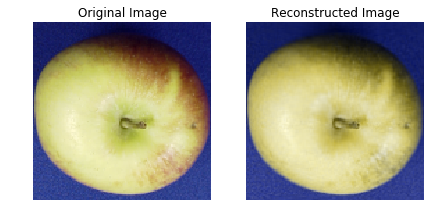

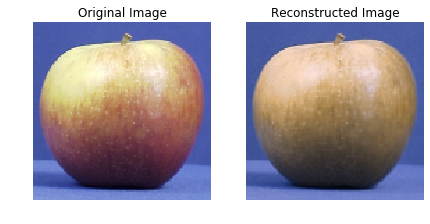

In [32]:
# Evaluate results
tensor_res_apple_up = residual_tensor(tensor_apple_up, tensor_tkd_apple_up)
tensor_res_apple_side = residual_tensor(tensor_apple_side, tensor_tkd_apple_side)
rel_error_apple_up = tensor_res_apple_up.frob_norm / tensor_apple_up.frob_norm
rel_error_apple_side = tensor_res_apple_side.frob_norm / tensor_apple_side.frob_norm
print("Relative error of car image = {}".format(rel_error_apple_up))
print("Relative error of apple image = {}\n".format(rel_error_apple_side))
# Reconstruction
tensor_rec_apple_up = tensor_tkd_apple_up.reconstruct()
tensor_rec_apple_side = tensor_tkd_apple_side.reconstruct()

# Plot original and reconstructed images side by side
plot_tensors(tensor_apple_up, tensor_rec_apple_up)
plot_tensors(tensor_apple_side, tensor_rec_apple_side)

**Include your explanations here**
The reconstruction of apple image from top view is better the reconstruction of apple image from side view. In the top image, there is small parts of apple contains the colour red. In the decomposion, the red disappered. However, in the side image, the red colour of apple is gradually changed to green. Thus, in the decomposion, the colour is adjuseted to the combination between red and green.

### Solution: Part 3

When the value of multi-linear rank corresponding to the colour information channel mode is decreased to 1, the order of tensor is decreased from 3 to 2. And the reconstructed image will become gray image. However, if the value of the other two channel is decresed to 1, the image will loss the information of the structure. Thus, the reconstruction image will be distorted.